In [290]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [291]:
def rosenbrock(x):
    y = 100 * (x[1] - x[0]**2)**2 + (x[0] - 1)**2
    return y

In [292]:
x = torch.rand(2, requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.001)

In [293]:
for i in range(10):
    y = rosenbrock(x)
    optimizer.zero_grad()
    y.backward()
    optimizer.step()
    print(i+1,y.item())
    

1 5.532315731048584
2 0.9218693971633911
3 0.2933536171913147
4 0.171905517578125
5 0.14566926658153534
6 0.13962368667125702
7 0.13807880878448486
8 0.137559711933136
9 0.13727688789367676
10 0.13704895973205566


In [294]:
x0 = torch.rand(2)
niters = 500

In [295]:
x = x0.clone()
x.requires_grad = True

sgd = torch.optim.SGD([x], lr=0.001,momentum=0.9)

sgd_records = []
for i in range(niters):
    sgd.zero_grad()
    y = rosenbrock(x)
    y.backward()
    
    sgd.step()
    sgd_records.append(y.item())

In [296]:
print(x)

tensor([0.9571, 0.9158], requires_grad=True)


In [297]:
x0 = torch.rand(2)
niters = 500

In [298]:
x = x0.clone()
x.requires_grad = True

adam = torch.optim.Adam([x], lr=0.05)

adam_records = []
for i in range(niters):
    adam.zero_grad()
    y = rosenbrock(x)
    y.backward()
    
    adam.step()
    adam_records.append(y.item())
    
print(x)

tensor([0.9974, 0.9949], requires_grad=True)


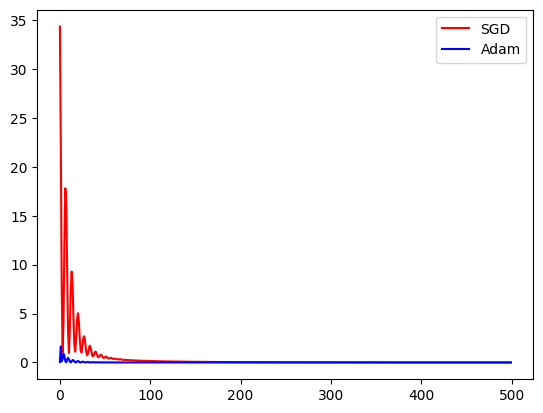

In [299]:
plt.plot(sgd_records,'r-',label='SGD')
plt.plot(adam_records,'b-',label='Adam')
plt.legend()

Text(0.5, 0, 'Iteration')

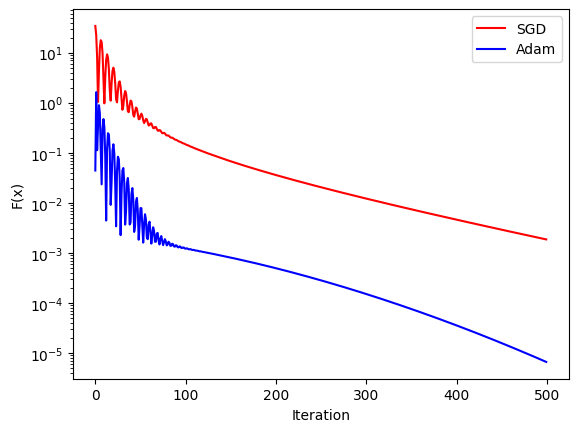

In [300]:
plt.semilogy(sgd_records,'r-',label='SGD')
plt.semilogy(adam_records,'b-',label='Adam')
plt.legend()

plt.ylabel('F(x)')
plt.xlabel('Iteration')


当我们建立神经网络时，经常会需要对不同的层设置不同的学习率。例如，我们希望对某些层设置较大的学习率，对某些层设置较小的学习率。为了实现这一点，我们可以使用optimizer.param_groups来访问不同的参数组。param_groups是一个包含了所有参数组的列表。每个参数组都是一个字典，包含了参数组的参数和参数值。在下面的例子中，我们为权重设置了较大的学习率，为偏置设置了较小的学习率。

In [306]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,3)
        self.conv2 = nn.Conv2d(6,6,3)
        
    def forward(self,x):
        out = self.conv2(self.conv1(x))
        return out

net = Net()

x = torch.randn(1,3,5,5)
net(x)
optimizer = torch.optim.SGD([
    {'params': net.conv1.parameters(), 'lr': 0.01},  # 为 conv1 层设定一个学习率
    {'params': net.conv2.parameters(), 'lr': 0.01},  # 为 conv2 层设定一个学习率
    {'params': net.fc1.parameters(), 'lr': 0.01},   # 为 fc1 层设定一个学习率
    {'params': net.fc2.parameters(), 'lr': 0.01},   # 为 fc2 层设定一个学习率
    {'params': net.fc3.parameters(), 'lr': 0.01}    # 为 fc3 层设定一个学习率
], lr=0.01, momentum=0.9)


In [304]:
x = torch.randn(1,3,5,5)
net(x)

tensor([[[[-0.1778]],

         [[ 0.4703]],

         [[ 0.0741]],

         [[-0.0929]],

         [[-0.2242]],

         [[ 0.3410]]]], grad_fn=<ConvolutionBackward0>)

In [305]:
optimizer = torch.optim.SGD(
    [{'params':net.conv1.parameters()},
     {'params':net.conv2.parameters(),'lr':0.001}],lr=0.01)
